In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
# This option enables plots to be inline, 
# as opposed to opening in a separate window.

from astropy import constants as const
import astropy.units as u
from astropy.units import cds

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

cds.enable()

# Problem 1 - Solving the equation of hydrostatic equilibium with known density.

### Constant Density and Decreasing Density

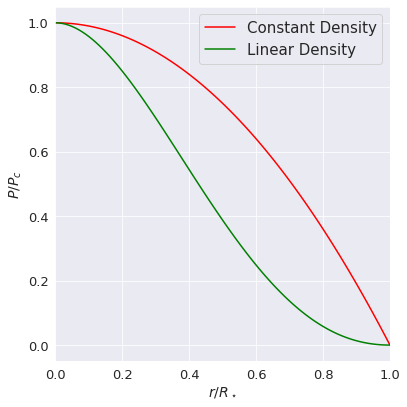

In [2]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
# The subplot routine creates a figure object (in the variable "fig"), which contains
# here a single plotting window called "axes" (in the variable "ax")
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})
# Set the font and font size for the whole figure.

ax.set_xlabel('$r/R_\star$') # the "r" is to say there is latex formatted strings.
ax.set_xlim(0,1)

ax.set_ylabel('$P/P_c$') 

#-------------------------------------------------------
# define an array of r / Rs, from 0 to 1, with 100 elements
r_rs = np.linspace(0,1,100)

# For constant density
P_Pc = 1.0 - r_rs**2

ax.plot(r_rs, P_Pc, c='red', label='Constant Density')

#-------------------------------------------------------
# For linearly decreasing density
P_Pc = 1.0 - 4.8 * r_rs**2 + 5.6 * r_rs**3 - 1.8 * r_rs**4

ax.plot(r_rs, P_Pc, c='green', label='Linear Density')
#-------------------------------------------------------
ax.legend(loc=0, fontsize=15)
plt.tight_layout()
# arrange the plot nicely

# Problem 2 - Now we would like to calculate the numerical value of the central pressure for a star of 1$M_{\odot}$ and 1$R_{\odot}$.

### 2a. Constant Density

In [3]:
rho = 1 * u.M_sun * 3.0 / (4.0 * np.pi * u.R_sun**3)
#print(rho)

#print(rho.decompose())
#print(rho.to(u.g / u.cm**3))
#print(rho.cgs)

print('In cgs units, the mean density of the sun is {:0.3g}'.format(rho.cgs))

gs = const.G * u.M_sun / u.R_sun**2
Pc = rho * gs * u.R_sun / 2.0

print('The central pressure is {:0.3g}'.format(Pc.to(u.dyn / u.cm**2)))

In cgs units, the mean density of the sun is 1.41 g / cm3
The central pressure is 1.34e+15 dyn / cm2


### 2b. Linearly Decreasing Density

In [5]:
rho = 3 * u.M_sun / (np.pi * u.R_sun**3)
print('Central density in cgs {:0.3g}'.format(rho.cgs))

gs = const.G * u.M_sun / u.R_sun**2
Pc = 5.0 * rho * gs * u.R_sun / 12.0
print('Central pressure is {:0.3g}'.format(Pc.to(u.dyn / u.cm**2)))

Central density in cgs 5.64 g / cm3
Central pressure is 4.48e+15 dyn / cm2
